<a href="https://colab.research.google.com/github/martaherraiz/APRENDIZAJE_AUTOMATICO_23_24/blob/main/P1Grupo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**P1 AA Configuración y Entrenamiento de una Red de Neuronas_23_24**




Grupo 1

Carmen Gallardo Martín, Marta Herraiz Méndez, Pablo Mendieta Ruiz

**ENUNCIADO:**
Crea un modelo de Red de Neuronas Artificiales que sea capaz de reconocer y clasificar
imágenes de ropa en sus diferentes tipologías. Este modelo será definido, configurado,
entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones.


In [15]:
# Importamos todas las librerias necesarias

import tensorflow as tf
from tensorflow import keras
import numpy as np

from keras.datasets import fashion_mnist

import matplotlib.pyplot as plt

from keras import models
from keras import layers

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.utils.np_utils import to_categorical

def crear_Network (NneuronasCapa1, funcionActivacion, Optimizador):
    network = models.Sequential()


    network.add(layers.Dense(NneuronasCapa1, activation=funcionActivacion, input_shape=(28*28,)))

    network.add(layers.Dense(10, activation='softmax'))


    network.summary()

    keras.utils.plot_model(network, "my_first_model.png", show_shapes=True)

    # OPTIMIZADOR, LA FUNCIÓN DE PÉRDIDA Y LAS MÉTRICAS
    network.compile(optimizer=Optimizador, loss='categorical_crossentropy',
                    metrics=['accuracy'])

    return network




def entrenar(network):
  network.fit(train_images, train_labels, epochs=5, batch_size=128)
  return network

# 8.- VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS

def evaluar(network):
  test_loss, test_acc = network.evaluate(test_images, test_labels)
  print('', test_loss)
  print('', test_acc)
  return

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0 118 204 181 175 213 199 168 197 111   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 173 225 185 179 225 158 142 227 173   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 170 229 226 226 233 151 167 234 158   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 194 222 212 226 222 240 218 230 163   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 198 222 210 207 211 207 208 231 147   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 188 220 209 210 211 215 208 230 144   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 183 232 214 220 212 220 213 239 158   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 183 232 217 216 215 219 216 238 160   0   1   0   0   0   

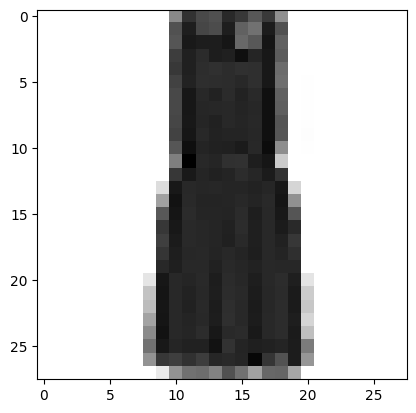

In [2]:
#Pre-procesado de datos

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(train_images.shape)
print(test_images.shape)

#Vemos la matriz de la imagen número 30.000 (28x28)
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[30000]))
# Vemos que la imagen número 30.000 corresponde al número 3(dress)
train_labels[30000]
# Veamos el elemento 30000 y pintémoslo con matplotlib

digit = train_images[30000]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()


**CONSTRUIMOS LA RNA**

In [8]:
# 3.- CONSTRUIMOS LA ARQUITECTURA DE LA RED
red1 = crear_Network (10,'relu','sgd')



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [4]:
# 5.- PREPARAMOS LOS DATOS DE IMAGEN CON ALGUNA TRANSFORMACIÓN. NORMALIZACION
# Los tensores transformados tienen la misma cantidad de datos total que el
# tensor inicial
train_images = train_images.reshape((60000, 28 * 28))


test_images = test_images.reshape((10000, 28 * 28))


print(train_images)
print(len(train_images))
print(train_images.shape)
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[3000]))



[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
60000
(60000, 784)
[[  0   0   0   0   0   0   0   0   1   1   0   0 120 131  91 147  30   0   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   1
    3   0   0   0   0 251 199 172 195 152   0   0   0   0   3   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0  43 124 193 166 239
  255 216 172 228 126  61   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96 167 155 159 171 178 211 215 210 196 189 158 164 159
  108   0   0   0   0   0   0   0   0   0   0   0   0  83 157 131 117 120 148 148 145 178 159 174 160 123 132 142 172  38   0   0   0   0   0
    0   0   0   0   0   0 159 128 118 120 122 112  93 124 161 109 128 128 129 146 138 167 122   0   0   0   0   0   0   0   0   0   0   0 171
  135 120 114 118 119 107 125 123 117 124 124 119 145 147 166 148   0   0   0   0   0   0   0   0   0   0   4 171 138 126 120 117 118 102 122
  145 111

In [5]:
# 6.- PREPARACIÓN LAS ETIQUETAS
# from keras import utils
# from keras.utils import to_categorical


train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels[30000] # Posición 0 a 9 donde solo la 3 tiene probabilidad 1.
# la imagen 30000 de entrenamiento es 3 (dress)

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [6]:
train_images = train_images.astype('float32') / 255
train_images, len(train_images), train_images.shape, train_images[3000]


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 60000,
 (60000, 784),
 array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.47, 0.51, 0.36, 0.58, 0.12, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.98, 0.78, 0.67, 0.76, 0.6 , 0.  ,
        0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.17, 0.49, 0.76, 0.65,
        0.94, 1.  , 0.85, 0.67, 0.89, 0.49, 0.24, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.38,
        0.65, 0.61, 0.62, 0.67, 0.7 , 0.83, 0.84, 0.82, 0.77, 0.74, 0.62, 0.64, 0.62, 0.42, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0

In [18]:
def switch_case(option):
    # Define las diferentes opciones
    if option == 1:
        network1 = crear_Network (10, 'relu', 'sgd')
        entrenar(network1)
        evaluar(network1)

    elif option == 2:
          network2 = crear_Network (10, 'relu', 'rmsprop')
          entrenar(network2)
          evaluar(network2)

    elif option == 3:
          network3 = crear_Network (10, 'sigmoid', 'sgd')
          entrenar(network3)
          evaluar(network3)

    elif option == 4:
          network4 = crear_Network (10, 'sigmoid', 'rmsprop')
          entrenar(network4)
          evaluar(network4)

    elif option == 5:
          network5 = crear_Network (512, 'relu', 'sgd')
          entrenar(network5)
          evaluar(network5)

    elif option == 6:
          network6 = crear_Network (512, 'relu', 'rmsprop')
          entrenar(network6)
          evaluar(network6)


    elif option == 7:
          network7 = crear_Network (512, 'sigmoid', 'sgd')
          entrenar(network7)
          evaluar(network7)


    elif option == 8:
          network8 = crear_Network (512, 'sigmoid', 'rmsprop')
          entrenar(network8)
          evaluar(network8)


    else:
        print("Opción no válida")

for i in range(8):
  option = i
  print('caso {i}')
  switch_case(option)
  i = i + 1



caso %d 0
Opción no válida
caso %d 1
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                7850      
                                                                 
 dense_15 (Dense)            (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 1.3462 - accuracy: 0.5513
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.8083 - accuracy: 0.7184
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.7032 - accuracy: 0.7513
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.6469 - accuracy: 0.7728
Epoch 5/5
313/

6. Utilice el siguiente código para graficar cómo de bien o de mal se comporta el
modelo para cada uno de los 8 casos

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  pedictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.ytickts([])

  plt.imshow(img, camp=plt.cm.binary)
  if predicted_label == true_label :
    color = 'blue'
  else :
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label]
                                     100*np.max(predictions_array)
                                     class_names[true_label])
                                     color = color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = "#777777")
  plt.ylim([0 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].setcolor('blue')



SyntaxError: ignored

Ejemplo de uso para ver la predicción de la 6ª figura de las imágenes de test.

In [ ]:
i = 0
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plot.subplot(1,2,2)
plotvalue_array(i,predictions[i], test_labales)
plt.show()


NameError: ignored